In [1]:
#movie reccomender system

#lets say when you go to a shop to buy something, you ask the shopkeeper show more similar products
#when you shopping online, you get those from a recomendation system like youtube, amazon,netflix, 
#google & similar other shows similar products or videos which they are looking so that customer
#dsnt get lost & get it asap #which will increase in sales conversion.

#it can be of 2 types:
#1)content based -- recomends based on similary of content by creating tags like if you are watching comedy movies or videos
#youtube or netflix will show you those types of videos or in amazon, if you searching for washing machine
#then it will show you all types of washing machines with different companies & prices

#2)collabrative filtering based -- it recomends based on similarity of 2 people, like A & B are person who are
#most similar in everything they do, it will recomend like person A bought this, you should also buy or person B watch
#this, you should also watch this etc. 1st one was based on user similarity & 2nd one is based on user similarity.
#like facebook & instagram similar friend recomendations.

#3)hybrid is a combination of both

In [2]:
#project flow

#data preprocessing
#model building
#convert to webapp
#deploy webapp

# pre processing

In [3]:
import numpy as np
import pandas as pd

In [4]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [5]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
credits.head(1)['crew'].values

array(['[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cam

# merging both df

In [8]:
movies.merge(credits,on='title')

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"":

In [9]:
movies.merge(credits,on='title').shape

(4809, 23)

In [10]:
movies = movies.merge(credits,on='title')
movies.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
3337,7300000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,25941,"[{""id"": 2801, ""name"": ""self-defense""}, {""id"": ...",en,Harry Brown,An elderly ex-serviceman and widower looks to ...,16.829837,"[{""name"": ""HanWay Films"", ""id"": 2395}, {""name""...",...,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every man has a breaking point.,Harry Brown,6.7,348,25941,"[{""cast_id"": 1, ""character"": ""Harry Brown"", ""c...","[{""credit_id"": ""52fe44e6c3a368484e03d265"", ""de..."
3348,7000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/1130/Live-and-Le...,253,"[{""id"": 212, ""name"": ""london england""}, {""id"":...",en,Live and Let Die,James Bond must investigate a mysterious murde...,30.465138,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...",...,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Roger Moore is James Bond.,Live and Let Die,6.4,533,253,"[{""cast_id"": 19, ""character"": ""James Bond"", ""c...","[{""credit_id"": ""52fe422dc3a36847f800a0ad"", ""de..."
417,8000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,16281,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 3335,...",en,Creepshow,"Inspired by the E.C. comics of the 1950s, Geor...",13.661289,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...",...,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Most Fun You'll Ever Have... BEING SCARED!,Creepshow,6.7,226,16281,"[{""cast_id"": 9, ""character"": ""Henry Northrup (...","[{""credit_id"": ""52fe46c09251416c750824fb"", ""de..."
3194,0,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",NaN,293670,"[{""id"": 572, ""name"": ""sex""}, {""id"": 1415, ""nam...",ko,곡성,A stranger arrives in a little village and soo...,9.050290,"[{""name"": ""Fox International Productions"", ""id...",...,156.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Never be tempted.,The Wailing,7.2,250,293670,"[{""cast_id"": 0, ""character"": ""Jong-Goo"", ""cred...","[{""credit_id"": ""58eb3002c3a36872f6081fc9"", ""de..."
2323,18000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,157,[],en,Star Trek III: The Search for Spock,Admiral Kirk and his bridge crew risk their ca...,15.314027,"[{""name"": ""Paramount Pictures"", ""id"": 4}]",...,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,A dying planet. A fight for life.,Star Trek III: The Search for Spock,6.4,434,157,"[{""cast_id"": 5, ""character"": ""Admiral James T....","[{""credit_id"": ""52fe4220c3a36847f8005eb3"", ""de..."


# decide which column to keep 

In [11]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [12]:
#since we have to create content based movie recomender system
#which means we have to create tags for each movie
#think for each column & decide whether to keep or delete

In [13]:
# genres
# id - helpful to fetch movie posters in webapp building
# keywords
# overview
# cast
# title

In [14]:
movies = movies[['genres','id','keywords','overview','cast','title','crew']]
movies.sample(5)

,genres,id,keywords,overview,cast,title,crew
897,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",9969,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1700, ""...",Two neighbors have it out after one of them de...,"[{""cast_id"": 20, ""character"": ""Buddy Hall"", ""c...",Deck the Halls,"[{""credit_id"": ""52fe4553c3a36847f80c7f93"", ""de..."
985,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",241554,"[{""id"": 2708, ""name"": ""hitman""}, {""id"": 9748, ...",Brooklyn mobster and prolific hit man Jimmy Co...,"[{""cast_id"": 3, ""character"": ""Jimmy Conlon"", ""...",Run All Night,"[{""credit_id"": ""52fe4eb9c3a36847f82a3fd5"", ""de..."
1983,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 10751...",24961,"[{""id"": 4232, ""name"": ""melancholy""}, {""id"": 15...",A Thanksgiving dinner brings a host of family ...,"[{""cast_id"": 1, ""character"": ""Dorothy"", ""credi...",The Wiz,"[{""credit_id"": ""52fe44b2c3a368484e031a51"", ""de..."
3564,"[{""id"": 27, ""name"": ""Horror""}]",72571,"[{""id"": 616, ""name"": ""witch""}, {""id"": 1156, ""n...","In 1988, evil begins to terrorize young sister...","[{""cast_id"": 1003, ""character"": ""Katie"", ""cred...",Paranormal Activity 3,"[{""credit_id"": ""535d01fbc3a36830b0003e43"", ""de..."
2348,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 80, ""nam...",16991,"[{""id"": 642, ""name"": ""robbery""}, {""id"": 10048,...",Bi-polar mall security guard Ronnie Barnhardt ...,"[{""cast_id"": 3, ""character"": ""Ronnie Barnhardt...",Observe and Report,"[{""credit_id"": ""52fe46fb9251416c7508a1a9"", ""de..."


# feature creation

In [15]:
# since we have to create tags so we will merge genres, keywords,overview & cast columns to make a new column called "tag"
# add keywords from each columns to "overview" column & we will end up with a big para for each movie
# our task is to create a para with keywords fr each movie in a new column "tag"

In [16]:
movies.isnull().sum()

genres      0
id          0
keywords    0
overview    3
cast        0
title       0
crew        0
dtype: int64

In [17]:
movies.dropna(inplace=True)

In [18]:
movies.duplicated().sum()

0

In [19]:
# lets create columns

In [20]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [21]:
#its a list if dictionary
#we wnt it in this format: ['action','adventure','fantasy','scifi']

In [22]:
# def convert(obj):
#     lis = []
#     for i in obj:
#         lis.append(i['name'])
    
#     return lis

In [23]:
# we also need to convert this string of list into list
# so that convert function will work on it

In [24]:
# ast to convert string of list to list
import ast

In [25]:
def convert(obj):
    lis = []
    for i in ast.literal_eval(obj):
        lis.append(i['name'])
    
    return lis

In [26]:
#now apply this convert function to df columns

In [27]:
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [28]:
movies['genres'] = movies['genres'].apply(convert)

In [29]:
movies['keywords'] = movies['keywords'].apply(convert)

In [30]:
movies.head()

,genres,id,keywords,overview,cast,title,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...",Avatar,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...",Pirates of the Caribbean: At World's End,"[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...",Spectre,"[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...",The Dark Knight Rises,"[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...",John Carter,"[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [31]:
# movies['cast'] only have main actors in 0th,1st & 2nd index
movies['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [32]:
def convert_cast(obj):
    lis = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            lis.append(i['name'])
            counter+=1
        else:
            break
    return lis

In [33]:
movies['cast'].apply(convert_cast)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [34]:
#getting 3 main actors for each movie 

In [35]:
movies['cast'] = movies['cast'].apply(convert_cast)

In [36]:
#we only need those crew dictionary where job value is director & not anything else like editor, singer etc

movies['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [37]:
def fetch_director(obj):
    lis = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            lis.append(i['name'])
            break
    return lis                

In [38]:
movies['crew'].apply(fetch_director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [39]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [40]:
# movies overview is a string, converting string to list so that all columns will be list

movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [41]:
movies['overview'].apply(lambda x:x.split())

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4804    [El, Mariachi, just, wants, to, play, his, gui...
4805    [A, newlywed, couple's, honeymoon, is, upended...
4806    ["Signed,, Sealed,, Delivered", introduces, a,...
4807    [When, ambitious, New, York, attorney, Sam, is...
4808    [Ever, since, the, second, grade, when, he, fi...
Name: overview, Length: 4806, dtype: object

In [42]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [43]:
movies.head(5)

,genres,id,keywords,overview,cast,title,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",Avatar,[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",Pirates of the Caribbean: At World's End,[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",Spectre,[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",The Dark Knight Rises,[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",John Carter,[Andrew Stanton]


In [44]:
#now we have all columns in list with keywords
#so now we can just add them together to form a new column called tags with big para in str format
#before we do that, there is a problem which needs to be handled before
#we need to remove spaces between 1st & last name so that it will become unique

In [45]:
def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [46]:
movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

In [47]:
movies.sample(5)

,genres,id,keywords,overview,cast,title,crew
2652,"[Drama, Action, Thriller]",24206,[],"[Waxman, is, a, former, Special, Forces, soldi...","[DolphLundgren, GinaBellman, ConradDunn]",Silent Trigger,[RussellMulcahy]
3285,"[Drama, Adventure]",110683,[highwayman],"[Caroline, is, to, be, wed, to, Sir, Ralph, an...","[FayeDunaway, JohnGielgud, DenholmElliott]",The Wicked Lady,[MichaelWinner]
921,"[Drama, Comedy, Family]",74465,[zoo],"[Benjamin, has, lost, his, wife, and,, in, a, ...","[MattDamon, ScarlettJohansson, ThomasHadenChurch]",We Bought a Zoo,[CameronCrowe]
2205,[Comedy],10710,"[jealousy, inventor, neighbor, bestfriend, mil...","[A, man, becomes, increasingly, jealous, of, h...","[BenStiller, JackBlack, RachelWeisz]",Envy,[BarryLevinson]
2266,"[Drama, Mystery, Thriller, Crime, Romance]",46503,"[difficultchildhood, patriarch, childhoodtraum...","[Newly-discovered, facts,, court, records, and...","[KirstenDunst, RyanGosling, KristenWiig]",All Good Things,[AndrewJarecki]


In [48]:
#lets now create a column called ['tags']

In [49]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [50]:
movies.sample(5)

,genres,id,keywords,overview,cast,title,crew,tags
3824,"[Comedy, Crime, Drama]",37495,"[terrorism, britishfarce]","[Four, Lions, tells, the, story, of, a, group,...","[RizAhmed, NigelLindsay, KayvanNovak]",Four Lions,[ChrisMorris],"[Four, Lions, tells, the, story, of, a, group,..."
1060,[Drama],7214,"[blackpeople, autoritianeducation, sport, high...","[Based, on, a, true, story,, in, which, Richmo...","[SamuelL.Jackson, RobBrown, RobertRi'chard]",Coach Carter,[ThomasCarter],"[Based, on, a, true, story,, in, which, Richmo..."
1702,"[Drama, Music]",277216,"[brotherbrotherrelationship, aids, policebruta...","[In, 1987,, five, young, men,, using, brutally...","[O'SheaJacksonJr., CoreyHawkins, JasonMitchell]",Straight Outta Compton,[F.GaryGray],"[In, 1987,, five, young, men,, using, brutally..."
3426,"[Drama, Music]",16620,"[musical, death, dyingyoung, nostalgic, mexica...","[Biographical, story, of, the, rise, from, now...","[LouDiamondPhillips, DaniellevonZerneck, Eliza...",La Bamba,[LuisValdez],"[Biographical, story, of, the, rise, from, now..."
1511,"[Crime, Comedy, Action]",38322,"[undercover, fbi, sequel, comedy, disguise, fb...","[FBI, agent, Malcolm, Turner, and, his, 17-yea...","[MartinLawrence, BrandonT.Jackson, PortiaDoubl...","Big Mommas: Like Father, Like Son",[JohnWhitesell],"[FBI, agent, Malcolm, Turner, and, his, 17-yea..."


In [51]:
#creating new df with relevant columns only
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
new.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [52]:
#converting tags list into strings

In [53]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [54]:
new['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [55]:
#convert into lowercase

new['tags'] = new['tags'].apply(lambda x:x.lower())
new.head()

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [56]:
#so now we have for each movie, movie recomender system will take user input as movie & model will return with similar 5 movies
#how will model find similar movies?

In [57]:
new['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [58]:
new['tags'][1]

"captain barbossa, long believed to be dead, has come back to life and is headed to the edge of the earth with will turner and elizabeth swann. but nothing is quite as it seems. adventure fantasy action ocean drugabuse exoticisland eastindiatradingcompany loveofone'slife traitor shipwreck strongwoman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstinger johnnydepp orlandobloom keiraknightley goreverbinski"

In [59]:
#we have to find similarity between these 2 tags
#may be we can find no of same words in both movies, if its very high then its similar
#but this approach is not so good, we will convert this text into vector 
#so we will have 5000 vectors for each movie & when we have to return similar movies, we will return 
#closest vector's associated with movie
#this process is called "text-vectorization" & the technique is called 'bag of words'
#it will add all text into a larger text -- extract 5000 most common words
#run those 5000 extracted words in each movie tag to find how many times those 5000 words appear
#in each tags & create a vector. so we will have 5000 vectors.
#whenever customer input any movie, then we will return 5 closest movie vectors  

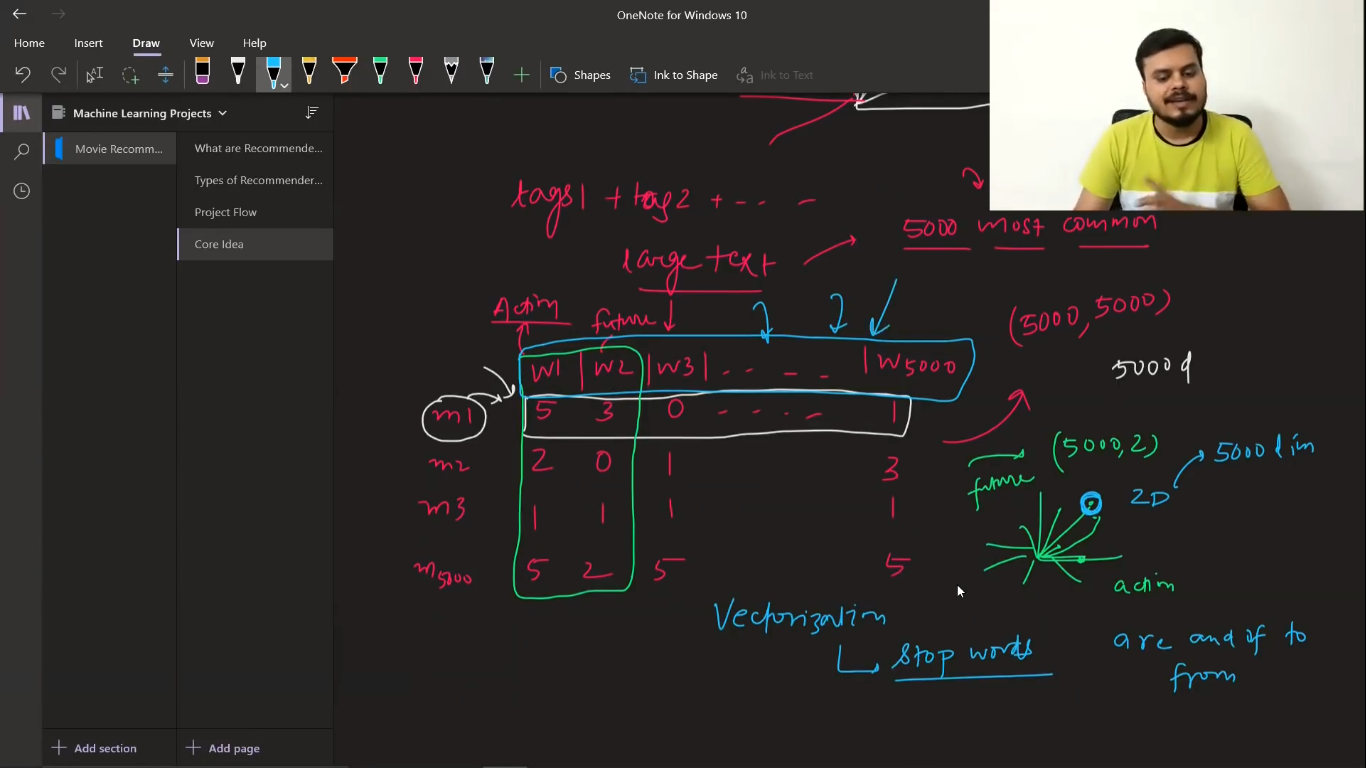

# handling similar words

In [60]:
#5000 most commonn words
# cv.get_feature_names()

In [61]:
# len(cv.get_feature_names())

In [62]:
#there are many words which are actually same but created multiple vectors
#like actor & actors, bully & bullied, accept,sccepts, accepted etc

In [63]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [64]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

In [65]:
ps.stem('loved','loving')

'love'

In [66]:
stem("in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron")

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

In [67]:
new['tags'] = new['tags'].apply(stem)

# removing stopwords & creating vectors

In [68]:
#when performing vectorization, we will exclude stop words. what is stop words? It is those words which has no real meaning
#it just there to form a sentence like to, for, is, are etc

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [70]:
vector = cv.fit_transform(new['tags']).toarray()

In [71]:
vector.shape

(4806, 5000)

In [72]:
vector[498]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
cv.get_feature_names()

C:\Users\User.DESKTOP-4E5E1RJ\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

In [76]:
#now we have vectors of each movie
#total of 4806 moves which has 5000 common words
#so we have to find the distance between each vector
#lesser distance will have more similarity
#we will not calculate eucladian distance rather cosine distance
#which is angle between each vector, if angle is small then similar & if not then not similar
#like if angle is 5degree or 25degree they are similar but if the angle is 180degree or 90degree then they are not similar
#whenver we work on high dimensional data they eucladian distance always fail

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [80]:
similarity.shape

(4806, 4806)

In [81]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [82]:
similarity[0].shape

(4806,)

In [83]:
similarity[1]

array([0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
       0.02615329])

In [84]:
similarity[1].shape

(4806,)

# creating function to return 5 similar movies

In [85]:
#find index of the movie
#sort in reverse order
#in order to keep index we will enumerate


def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)

In [88]:
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [89]:
recommend('Gandhi')

Gandhi, My Father
Guiana 1838
The Wind That Shakes the Barley
Mr. Turner
The Sea Inside


In [90]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [91]:
recommend('Ramanujan')

A Beautiful Mind
The R.M.
Le Havre
Son of God
City By The Sea


# pickle 

In [92]:
import pickle

In [93]:
pickle.dump(new,open('movies.pkl','wb'))

In [95]:
new['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [96]:
#since new df is giving error in streamlit app 
# so we will convert df to dict & make a pkl file out of it

In [97]:
pickle.dump(new.to_dict(),open('movies_dict.pkl','wb'))

In [98]:
pickle.dump(similarity,open('similarity.pkl','wb'))